# WELCOME TO MY NOTEBOOK!
# Mandatory Assignment - 1

Dataset used: https://www.kaggle.com/datasets/yasserh/wine-quality-dataset
Please note that GPT was used as a way to improve plotting and structuring of the notebook elements:

In [1]:
# Imports:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import add_dummy_feature, StandardScaler

In [2]:
#Supplmententary to make OS/computer indepentent.
# Get the current notebook's directory
current_dir = os.getcwd()
# Build the path to the sibling "Files" folder
file_path = os.path.join(current_dir, "files", "WineQT.csv")
print("Path buildt is : \n", file_path)
print("Does the file exists? -> ", os.path.exists(file_path))

Path buildt is : 
 C:\Developer\Jupyter Notebook\Machine_Learning_Jupyter_Notebook\files\WineQT.csv
Does the file exists? ->  True


# Exercice 1.1 - Data Exploration:

In [3]:
# Q-1.1.1
dframe = pd.read_csv(file_path)

print(dframe.iloc[:5,:])

   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  Id  
0      9.4        5   0  
1      9.8        5   1  
2      9

In [4]:
# Q-1.1.2
#  Calculating the variation using the coefficient of variation.
# "/ `mean`" is needed since the features are on different scales and units from each other.
summary = dframe.describe()

print((summary.loc["std"] / summary.loc["mean"]).sort_values(ascending=False))
# Here we can See that citric acid has the highest variation based on the statistics given.

citric acid             0.732907
total sulfur dioxide    0.713979
free sulfur dioxide     0.656431
Id                      0.576416
chlorides               0.543724
residual sugar          0.535480
volatile acidity        0.338077
sulphates               0.259080
fixed acidity           0.210272
quality                 0.142446
alcohol                 0.103638
pH                      0.047316
density                 0.001931
dtype: float64


In [5]:
# Exercice 1.2 - Correlation Analysis:
# -----------------------------

#Q-1.2.1: 
# Correlation matrix is a -1 to 1 scale,
# where "-1" is "Strong NEGATIVE correlation" and "1" is "Strong POSITIVE Correlation"

corr_matrix = dframe.corr() #For normal numpy array view, we can add ".values"
print(corr_matrix) 

                      fixed acidity  volatile acidity  citric acid  \
fixed acidity              1.000000         -0.250728     0.673157   
volatile acidity          -0.250728          1.000000    -0.544187   
citric acid                0.673157         -0.544187     1.000000   
residual sugar             0.171831         -0.005751     0.175815   
chlorides                  0.107889          0.056336     0.245312   
free sulfur dioxide       -0.164831         -0.001962    -0.057589   
total sulfur dioxide      -0.110628          0.077748     0.036871   
density                    0.681501          0.016512     0.375243   
pH                        -0.685163          0.221492    -0.546339   
sulphates                  0.174592         -0.276079     0.331232   
alcohol                   -0.075055         -0.203909     0.106250   
quality                    0.121970         -0.407394     0.240821   
Id                        -0.275826         -0.007892    -0.139011   

                   

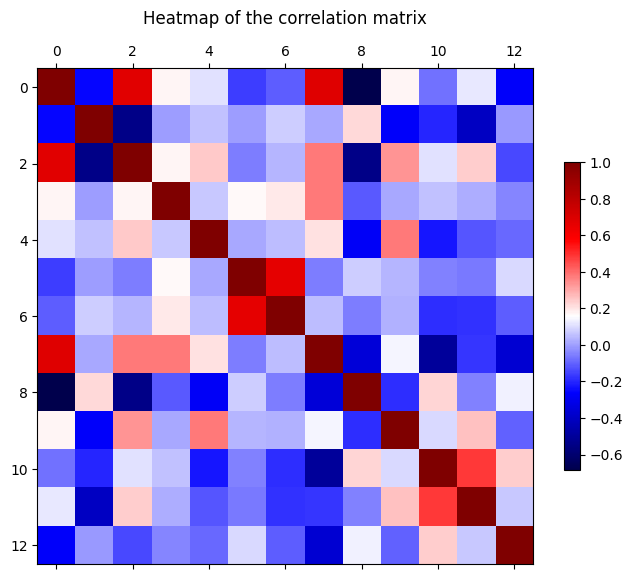

(13, 13)


In [6]:
#Q-1.2.2:
#Using "corr_matrix" from above!

matrix = corr_matrix
fig, ax = plt.subplots(figsize= (8,8))

cax = ax.matshow(matrix, cmap="seismic") #Adding the heatmap colour.
fig.colorbar(cax, shrink=0.5, aspect=20) #Shrinking it...

#Placing title above plot.
plt.title("Heatmap of the correlation matrix", pad=15)
plt.show()

print(matrix.shape) #Just checking the matrix dimention.

In [7]:
#Q-1.2.3:
#Here we can either look at the matrix plot with  X = quality, and Y = Visually find the "reddest" one.
# OR we can do the lazy way:
quality_corr = dframe.corr()["quality"]
print(quality_corr.sort_values(ascending=False))
# Looking at the positive top, we can find both quality and alchohol, where alchohol is the feature
# that has the highest POSITIVE correlation with quality.
# Volatile acidity is the one with the highest NEGATIVE correlation.

quality                 1.000000
alcohol                 0.484866
sulphates               0.257710
citric acid             0.240821
fixed acidity           0.121970
Id                      0.069708
residual sugar          0.022002
pH                     -0.052453
free sulfur dioxide    -0.063260
chlorides              -0.124085
density                -0.175208
total sulfur dioxide   -0.183339
volatile acidity       -0.407394
Name: quality, dtype: float64


#Q1.2.4:



Alchohol has a positive correlation with quality of around 0.485, while pH has a negative one of around -0.0525. The absolute value of the correlation shows us good it is as a predictor value, absolute because it can both predict higher and lower quality. 

Since the pH is close to zero, meaning it almost doesnt correlate with the quality, and that the alcohol feature has a much higher absolute value we can say that the alcohol feature is better  suited for prediciting quality.


# Exercice 1.3 Linear Regression

In [8]:
#Q-1.3.1
#DataFrame values:
yQualityVal = dframe["quality"].values
xChloridesVal = dframe["chlorides"].values
        
#Reframing into 2D matrix:
xChlorides_2D = xChloridesVal.reshape(-1, 1)
yQualityVal_2D = yQualityVal.reshape(-1, 1)
    
#Preproccessing the values:
xC_bias = add_dummy_feature(xChlorides_2D)
xC_T = xC_bias.T #Transposing the xValue including bias.



#Gradient Descent Adjustable Values:
learnRate = 0.1 ## Random small learning rate.
n_epochs = 1000 # learning groups.

#Descent:
np.random.seed(42) #Fixed random seed, so values can be recreated.
thetaChl = np.random.randn(2, 1) #Random 2x1 vector.
m = len(xChloridesVal) # m instances
for epoch in range(n_epochs):

    gradients = (2 / m) * xC_T @ (xC_bias @ thetaChl - yQualityVal_2D)
    thetaChl = thetaChl - learnRate * gradients


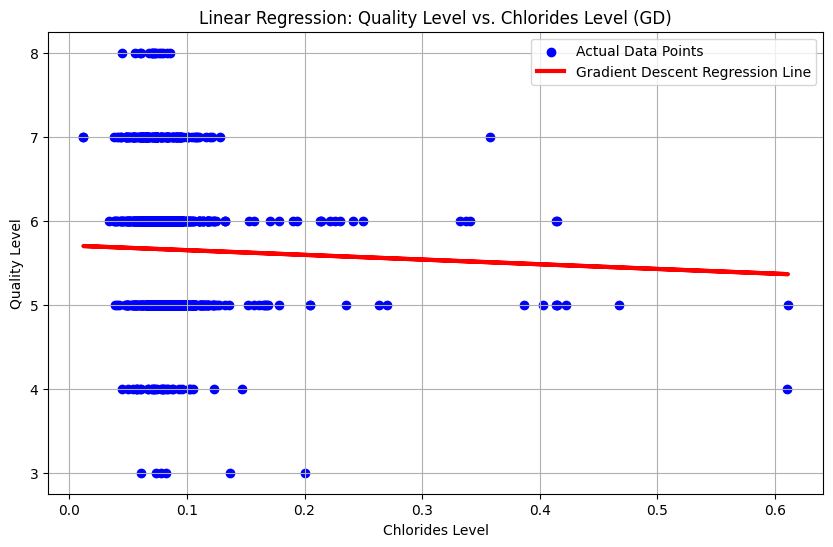

In [9]:
#Disclaimer GPT is used to plot with self-made gradient descent code.

# 1. Calculate the Regression Line Predictions
# y_predict = theta[0, 0] + theta[1, 0] * xChloridesVal
y_predict = thetaChl[0, 0] + thetaChl[1, 0] * xChloridesVal

# 2. Create the Plot
plt.figure(figsize=(10, 6))

# Scatter plot of the actual data points
plt.scatter(xChloridesVal, yQualityVal, color='blue', label='Actual Data Points')

# Plot the regression line
# We plot the calculated predictions against the original features
plt.plot(xChloridesVal, y_predict, color='red', linewidth=3, label='Gradient Descent Regression Line')

# 3. Add Labels and Title
plt.xlabel("Chlorides Level")
plt.ylabel("Quality Level")
plt.title("Linear Regression: Quality Level vs. Chlorides Level (GD)")
plt.legend()
plt.grid(True)
plt.show() # Use plt.show() to display the plot in your environment

In [10]:
#Q-1.3.2:
# TASK: Fit a simple linear regression model predicting quality using only alcohol.

#Note: Might give runtimeWarning, this can cause nan values at the end of the vector Array.
# The runetimeWarning can be stopped by reducing the learning rate from 0.1 to a lower number, 
# here the learning rate is at 45e-5, both because of the runtimeWarning and under/over-shooting from the gradient line.
# Overshoot (Might indicate a high learningrate -> reduce learningRate)
# Undershoot (Might indicate a low learningrate -> increase learningRate)

In [11]:
#DataFrame values:
yQualityVal = dframe["quality"].values
xAlcoholVal = dframe["alcohol"].values
        
#Reframing into 2D matrix:
xAlcoholVal_2D = xAlcoholVal.reshape(-1, 1)
yQualityVal_2D = yQualityVal.reshape(-1, 1)

#NEW! Uses scikit`s scaler to normalize the alcohol values.
scaler = StandardScaler()
# Fit and transform the feature data
xAlcohol_scaled = scaler.fit_transform(xAlcoholVal_2D) 


#Preproccessing the values:
xAlc_bias = add_dummy_feature(xAlcohol_scaled)
xAlc_T = xAlc_bias.T #Transposing the xValue including bias.


#Gradient Descent Adjustable Values:
learnRate = 45e-5 ## Random small learning rate.
n_epochs = 1000 # learning groups.

#Descent:
np.random.seed(42) #Fixed random seed, so values can be recreated.
thetaAlc = np.random.randn(2, 1) #Random 2x1 vector.
m = len(xChloridesVal) # m instances
for epoch in range(n_epochs):

    gradients = (2 / m) * xAlc_T @ (xAlc_bias @ thetaAlc - yQualityVal_2D)
    thetaAlc = thetaAlc - learnRate * gradients

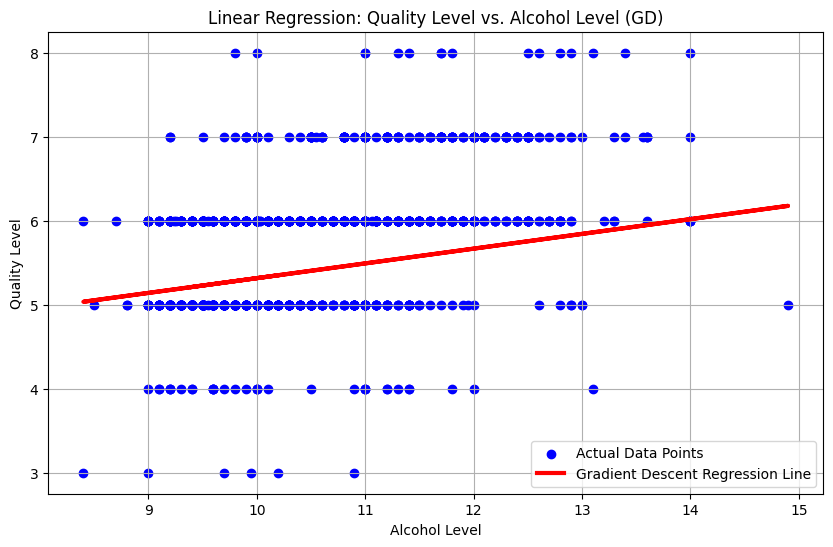

In [12]:
#Code from above, with few adjustments for alchoholVal.

# 1. Calculate the Regression Line Predictions
y_predict = thetaAlc[0, 0] + thetaAlc[1, 0] * xAlcoholVal

# 2. Create the Plot
plt.figure(figsize=(10, 6))

# Scatter plot of the actual data points
plt.scatter(xAlcoholVal, yQualityVal, color='blue', label='Actual Data Points')

# Plot the regression line
# We plot the calculated predictions against the original features
plt.plot(xAlcoholVal, y_predict, color='red', linewidth=3, label='Gradient Descent Regression Line')

# 3. Add Labels and Title
plt.xlabel("Alcohol Level")
plt.ylabel("Quality Level")
plt.title("Linear Regression: Quality Level vs. Alcohol Level (GD)")
plt.legend()
plt.grid(True)
plt.show() # Use plt.show() to display the plot in your environment

In [13]:
#Q-1.3.3
# Retrieving the intercept and coefficient for both the thetaChl (Chlorides) and thetaAlc (Alcohol).

final_intercept = thetaChl[0, 0]
final_coefficient = thetaChl[1, 0]
print( "CHLORIDES VALUES:" )
print(f"Final Intercept (Bias, theta_0): {final_intercept:.4f}")
print(f"Final Coefficient (Chlorides Weight, theta_1): {final_coefficient:.4f}")

final_intercept = thetaAlc[0, 0]
final_coefficient = thetaAlc[1, 0]
print( "ALCOHOL VALUES:" )
print(f"Final Intercept (Bias, theta_0): {final_intercept:.4f}")
print(f"Final Coefficient (Alcohol Weight, theta_1): {final_coefficient:.4f}")

CHLORIDES VALUES:
Final Intercept (Bias, theta_0): 5.7053
Final Coefficient (Chlorides Weight, theta_1): -0.5590
ALCOHOL VALUES:
Final Intercept (Bias, theta_0): 3.5599
Final Coefficient (Alcohol Weight, theta_1): 0.1756


Both models are bad at predicting an accurate value, but gives a pointer towards how the feature changes the quality in terms of positive/negative. The final coefficients shows us that the increace of alcohol might indicate an increase in the quality, but the increase of chlorides indicates a fall of quality.
Since a coefficient value towards zero means that the feature doesn`t seem to affect the quality, we can suggest the model with the highest absolute value of coef might be better..

Since non-alcoholic wine is possible, the intercept value from the alcohol gives us a theoretical guideline for how it will be in quality, same with the chlorides.

In [14]:
#Q-1.3.4
#Plottet above..
#The regression line fits "well enough" to indicate the most common quality levels after adjusting the learning-rate.
#  Though it does not fit all of the data points since it adjusts itselfs to vertical clusters, which causes alot of outliers.
# 

# Exercice 1.4 - Train-Test Split

In [15]:

# ---------------------
# imports:
import numpy as np
from sklearn.model_selection import KFold
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_squared_error, r2_score



In [16]:
# Preproc:
y_full = dframe["quality"].values
X_full = dframe["alcohol"].values.reshape(-1, 1)

# Initialize metric lists:
mse_scores = []
rmse_scores = []
r2_scores = []

# Simple Linear Regression model(SGD)
sgd_reg = SGDRegressor(max_iter=1000, tol=1e-3, penalty=None, random_state=42)

# KFold creates the 5 non-overlapping 80% train / 20% test splits
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Loop Through the 5 Folds, Train, and Evaluate
print("Starting 5-Fold Cross-Validation (80% Train / 20% Test per Fold):")
print("-" * 50)

# kf.split() yields the indices for splitting X_full and y_full
for i, (train_index, test_index) in enumerate(kf.split(X_full)):
    
    # Split the data for the current fold
    X_train, X_test = X_full[train_index], X_full[test_index]
    y_train, y_test = y_full[train_index], y_full[test_index]
    
    # Train the model (Gradient Descent finds the optimal theta values for this 80% subset)
    sgd_reg.fit(X_train, y_train)
    
    # Predict on the test set (using the learned theta values)
    y_pred = sgd_reg.predict(X_test)
    
    # Evaluate the model on the 20% test set:
    
    # Mean Squared Error (MSE)
    mse = mean_squared_error(y_test, y_pred)
    mse_scores.append(mse)
    
    # Root Mean Squared Error (RMSE)
    rmse = np.sqrt(mse)
    rmse_scores.append(rmse)
    
    # R2 Score (Coefficient of Determination)
    r2 = r2_score(y_test, y_pred)
    r2_scores.append(r2)

    # Current fold, analysis:
    print(f"--- Fold {i+1} Evaluation ---")
    print(f"  MSE:  {mse:.4f}")
    print(f"  RMSE: {rmse:.4f}")
    print(f"  R2:   {r2:.4f}")
    print(f"  Coef (Theta_1): {sgd_reg.coef_[0]:.4f}")
    print(f"  Intercept (Theta_0): {sgd_reg.intercept_[0]:.4f}")

Starting 5-Fold Cross-Validation (80% Train / 20% Test per Fold):
--------------------------------------------------
--- Fold 1 Evaluation ---
  MSE:  0.4592
  RMSE: 0.6776
  R2:   0.1748
  Coef (Theta_1): 0.5100
  Intercept (Theta_0): 0.4042
--- Fold 2 Evaluation ---
  MSE:  0.6222
  RMSE: 0.7888
  R2:   0.1550
  Coef (Theta_1): 0.5030
  Intercept (Theta_0): 0.3204
--- Fold 3 Evaluation ---
  MSE:  0.5459
  RMSE: 0.7389
  R2:   0.1944
  Coef (Theta_1): 0.5026
  Intercept (Theta_0): 0.3084
--- Fold 4 Evaluation ---
  MSE:  0.6455
  RMSE: 0.8035
  R2:   0.0543
  Coef (Theta_1): 0.5460
  Intercept (Theta_0): 0.2906
--- Fold 5 Evaluation ---
  MSE:  0.4897
  RMSE: 0.6998
  R2:   0.1674
  Coef (Theta_1): 0.5052
  Intercept (Theta_0): 0.4108


Question 1.4.1: 

The MSE and RMSE shows us that the model is missing with around 0.67 -> 0.81 points.
The R2 value of "0.1492 +/- 0.0492" shows us that the error rate is about 80 to 90 percent which combined with the MSE and RMSE tells us that alcohol is terrible at predicting wine quality.

In [17]:
#Q-1.4.2 code:
# Preproc:
y_full = dframe["quality"].values
X_full = dframe["chlorides"].values.reshape(-1, 1)

# Initialize metric lists:
mse_scores_chlo = []
rmse_scores_chlo = []
r2_scores_chlo = []

#----

# Simple Linear Regression model(SGD)
sgd_reg = SGDRegressor(max_iter=1000, tol=1e-3, penalty=None, random_state=42)

# KFold creates the 5 non-overlapping 80% train / 20% test splits
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Loop Through the 5 Folds, Train, and Evaluate
print("Starting 5-Fold Cross-Validation (80% Train / 20% Test per Fold):")
print("-" * 50)

# kf.split() yields the indices for splitting X_full and y_full
for i, (train_index, test_index) in enumerate(kf.split(X_full)):
    
    # Split the data for the current fold
    X_train, X_test = X_full[train_index], X_full[test_index]
    y_train, y_test = y_full[train_index], y_full[test_index]
    
    # Train the model (Gradient Descent finds the optimal theta values for this 80% subset)
    sgd_reg.fit(X_train, y_train)
    
    # Predict on the test set (using the learned theta values)
    y_pred = sgd_reg.predict(X_test)
    
    # Evaluate the model on the 20% test set:
    # Mean Squared Error (MSE)
    mse = mean_squared_error(y_test, y_pred)
    mse_scores_chlo.append(mse)
    
    # Root Mean Squared Error (RMSE)
    rmse = np.sqrt(mse)
    rmse_scores_chlo.append(rmse)
    
    # R2 Score (Coefficient of Determination)
    r2 = r2_score(y_test, y_pred)
    r2_scores_chlo.append(r2)

    # Current fold, analysis:
    print(f"--- Fold {i+1} Evaluation ---")
    print(f"  MSE:  {mse:.4f}")
    print(f"  RMSE: {rmse:.4f}")
    print(f"  R2:   {r2:.4f}")
    print(f"  Coef (Theta_1): {sgd_reg.coef_[0]:.4f}")
    print(f"  Intercept (Theta_0): {sgd_reg.intercept_[0]:.4f}")


Starting 5-Fold Cross-Validation (80% Train / 20% Test per Fold):
--------------------------------------------------
--- Fold 1 Evaluation ---
  MSE:  0.5585
  RMSE: 0.7473
  R2:   -0.0037
  Coef (Theta_1): 0.4093
  Intercept (Theta_0): 5.6225
--- Fold 2 Evaluation ---
  MSE:  0.7417
  RMSE: 0.8612
  R2:   -0.0072
  Coef (Theta_1): 0.4467
  Intercept (Theta_0): 5.6263
--- Fold 3 Evaluation ---
  MSE:  0.6854
  RMSE: 0.8279
  R2:   -0.0114
  Coef (Theta_1): 0.4404
  Intercept (Theta_0): 5.6273
--- Fold 4 Evaluation ---
  MSE:  0.6888
  RMSE: 0.8299
  R2:   -0.0091
  Coef (Theta_1): 0.4308
  Intercept (Theta_0): 5.6190
--- Fold 5 Evaluation ---
  MSE:  0.5940
  RMSE: 0.7707
  R2:   -0.0098
  Coef (Theta_1): 0.4151
  Intercept (Theta_0): 5.6070


Question 1.4.2 - Answer:

Though the RMSE isnt that higher then the alcohol model above, the R2 score below zero suggesting terrible predicting.

Question 1.4.3 - Answer:

Reasons for underfitting:

* A linear regression model is to simple to conprehend the actual data points and will most likely cause underfitting due to high bias.
* The last R2 scores are almost low.
* The data points contains outliers that will create noise.

In [18]:
#Q-1.4.4 Mean and variance from both models (alcohol and chloride).
print("-" * 50)
print("Alcohol -- Average Performance Across 5 Folds:")
print(f"  Avg. MSE:  {np.mean(mse_scores):.4f} +/- {np.std(mse_scores):.4f}")
print(f"  Avg. RMSE: {np.mean(rmse_scores):.4f} +/- {np.std(rmse_scores):.4f}")
print(f"  Avg. R2:   {np.mean(r2_scores):.4f} +/- {np.std(r2_scores):.4f}")


print("-" * 50)
print("Chloride -- Average Performance Across 5 Folds:")
print(f"  Avg. MSE:  {np.mean(mse_scores_chlo):.4f} +/- {np.std(mse_scores_chlo):.4f}")
print(f"  Avg. RMSE: {np.mean(rmse_scores_chlo):.4f} +/- {np.std(rmse_scores_chlo):.4f}")
print(f"  Avg. R2:   {np.mean(r2_scores_chlo):.4f} +/- {np.std(r2_scores_chlo):.4f}")



--------------------------------------------------
Alcohol -- Average Performance Across 5 Folds:
  Avg. MSE:  0.5525 +/- 0.0724
  Avg. RMSE: 0.7417 +/- 0.0488
  Avg. R2:   0.1492 +/- 0.0492
--------------------------------------------------
Chloride -- Average Performance Across 5 Folds:
  Avg. MSE:  0.6537 +/- 0.0672
  Avg. RMSE: 0.8074 +/- 0.0419
  Avg. R2:   -0.0082 +/- 0.0026


Q-1.4.4 - Answer text:

Both models have a bad MSE and RMSE score, but the chloride model has a much lower R2 score then the alcohol model. 
In summary: 
* Alcohol model is weak but useful.
* Chloride is terrible, where the relationship between quality and chloride could aswell be noise.

# Exercice 1.5 - Multiple Linear Regression

In [19]:
#Q-1.5.1

# Preproc:
y_full = dframe["quality"].values

X_full = dframe[["fixed acidity", "volatile acidity", "residual sugar", 
    "citric acid", "chlorides", "free sulfur dioxide","total sulfur dioxide",
    "density", "pH", "sulphates"]].values

# Initialize metric lists:
mse_scores_all = []
rmse_scores_all = []
r2_scores_all = []



#----

# Simple Linear Regression model(SGD)
sgd_reg = SGDRegressor(max_iter=1000, tol=1e-3, penalty=None, random_state=42)

# KFold creates the 5 non-overlapping 80% train / 20% test splits
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Loop Through the 5 Folds, Train, and Evaluate
print("Starting 5-Fold Cross-Validation (80% Train / 20% Test per Fold):")
print("-" * 50)

 #Scaler init:
scaler = StandardScaler()


# kf.split() yields the indices for splitting X_full and y_full
for i, (train_index, test_index) in enumerate(kf.split(X_full)):
    
    # Split the data for the current fold
    x_train, x_test = X_full[train_index], X_full[test_index]
    y_train, y_test = y_full[train_index], y_full[test_index]
    #Scale data inside loop, because we cant to them both together (indirect bias??)
    x_train_sc = scaler.fit_transform(x_train)
    x_test_sc = scaler.transform(x_test)
    
    
    # Train the model (Gradient Descent finds the optimal theta values for this 80% subset)
    sgd_reg.fit(x_train_sc, y_train)

    # Predict on the test set (using the learned theta values)
    y_pred = sgd_reg.predict(x_test_sc)
    
    # Evaluate the model on the 20% test set:
    # Mean Squared Error (MSE)
    mse = mean_squared_error(y_test, y_pred)
    mse_scores_all.append(mse)
    
    # Root Mean Squared Error (RMSE)
    rmse = np.sqrt(mse)
    rmse_scores_all.append(rmse)
    
    # R2 Score (Coefficient of Determination)
    r2 = r2_score(y_test, y_pred)
    r2_scores_all.append(r2)

    # Current fold, analysis:
    print(f"--- Fold {i+1} Evaluation ---")
    print(f"  MSE:  {mse:.4f}")
    print(f"  RMSE: {rmse:.4f}")
    print(f"  R2:   {r2:.4f}")
    print(f"  Coef (Theta_1): {sgd_reg.coef_[0]:.4f}")
    print(f"  Intercept (Theta_0): {sgd_reg.intercept_[0]:.4f}")

    
    print("------ For later tasks: --------") 
    avg_abs_coef = np.mean(np.abs(sgd_reg.coef_))
    max_abs_coef = np.max(np.abs(sgd_reg.coef_))
   
    print(f"  Avg. Abs. Coef: {avg_abs_coef:.4f}")
    print(f"  Max. Abs. Coef: {max_abs_coef:.4f}")
    

#End of for loop^^


# Average of all folds, print:
print("-" * 50)
print("Chloride -- Average Performance Across 5 Folds:")
print(f"  Avg. MSE:  {np.mean(mse_scores_all):.4f} +/- {np.std(mse_scores_all):.4f}")
print(f"  Avg. RMSE: {np.mean(rmse_scores_all):.4f} +/- {np.std(rmse_scores_all):.4f}")
print(f"  Avg. R2:   {np.mean(r2_scores_all):.4f} +/- {np.std(r2_scores_all):.4f}")



Starting 5-Fold Cross-Validation (80% Train / 20% Test per Fold):
--------------------------------------------------
--- Fold 1 Evaluation ---
  MSE:  0.4204
  RMSE: 0.6484
  R2:   0.2446
  Coef (Theta_1): 0.2433
  Intercept (Theta_0): 5.6596
------ For later tasks: --------
  Avg. Abs. Coef: 0.1461
  Max. Abs. Coef: 0.3298
--- Fold 2 Evaluation ---
  MSE:  0.5171
  RMSE: 0.7191
  R2:   0.2979
  Coef (Theta_1): 0.2218
  Intercept (Theta_0): 5.6629
------ For later tasks: --------
  Avg. Abs. Coef: 0.1474
  Max. Abs. Coef: 0.3252
--- Fold 3 Evaluation ---
  MSE:  0.4558
  RMSE: 0.6751
  R2:   0.3274
  Coef (Theta_1): 0.2314
  Intercept (Theta_0): 5.6637
------ For later tasks: --------
  Avg. Abs. Coef: 0.1508
  Max. Abs. Coef: 0.3267
--- Fold 4 Evaluation ---
  MSE:  0.4503
  RMSE: 0.6710
  R2:   0.3403
  Coef (Theta_1): 0.2041
  Intercept (Theta_0): 5.6587
------ For later tasks: --------
  Avg. Abs. Coef: 0.1417
  Max. Abs. Coef: 0.3168
--- Fold 5 Evaluation ---
  MSE:  0.3924
  RMSE

Question 1.5.2 - Answer:

The results from the multiple linear regression shows a huge improvement on the R2 score, and an average correction improvement of y = +/-0.15 data points! 
These are highly improved results, with a correction percentage of around 30 percent, but still far from a perfect model.

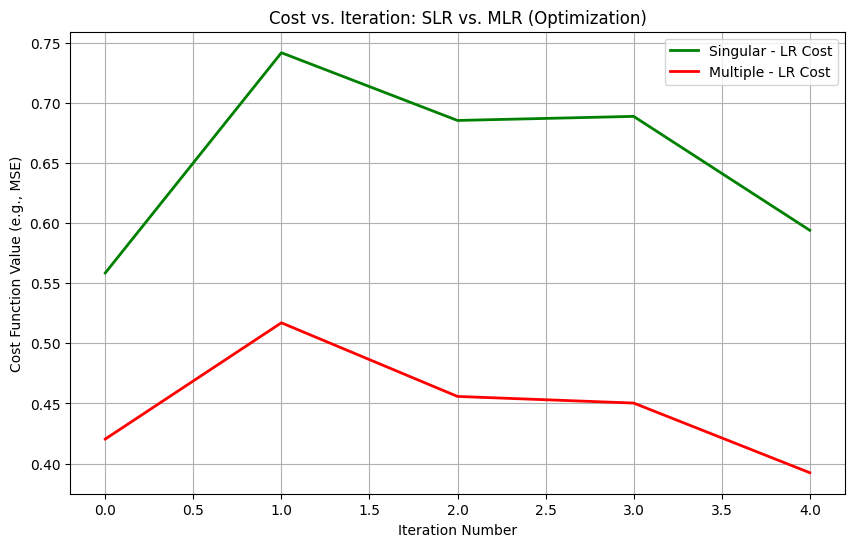

In [20]:
#Q.1.5.3:
#Code above is adjusted to track: 
# singular and multiple linear regression`s MSE in the array "mse_scores_all" and "mse_scores_chlo "
#


#NOTE!! This code snippet requires arrays from previous code:
    #mse_scores_all []  #multiple
    #mse_scores_chlo[] # Singular with chloride as feature.


plt.figure(figsize=(10, 6))

plt.plot(mse_scores_chlo, label='Singular - LR Cost', color='green', linewidth=2)
plt.plot(mse_scores_all, label='Multiple - LR Cost', color='red', linewidth=2)

plt.xlabel('Iteration Number')
plt.ylabel('Cost Function Value (e.g., MSE)')
plt.title('Cost vs. Iteration: SLR vs. MLR (Optimization)')
plt.legend()
plt.grid(True)
plt.show()

#Q.1.5.4: 
The plot above shows us the cost (MSE) against the itearation number (total of 5 iterations)

    Here we can see how the the singular model achives a much higher total cost per iteration, likely do to the underfitting of data points where the outliers can`t possibly be accounted for.

# Exercise-2

In [21]:
from sklearn.ensemble import RandomForestClassifier

feature_names = ["fixed acidity", "volatile acidity", "residual sugar",
                 "citric acid", "chlorides", "free sulfur dioxide",
                 "total sulfur dioxide", "density", "pH", "sulphates"]


x_features = dframe[["fixed acidity", "volatile acidity", "residual sugar",
                 "citric acid", "chlorides", "free sulfur dioxide",
                 "total sulfur dioxide", "density", "pH", "sulphates"]].values

y_quality = dframe["quality"].values

#Random forrest classifier, which automaticly estimates importance.
rnd_clf = RandomForestClassifier(n_estimators=500, random_state=42)
rnd_clf.fit(x_features,y_quality)

# Extracting the automaticly generated importance from the fitted set:
importances = rnd_clf.feature_importances_

# fixing the feature name with its corresponding importance value, then sorting:
feature_ranking = pd.Series(importances, index=feature_names)
sorted_ranking = feature_ranking.sort_values(ascending=False)

#print entire list:
print("\n--- Feature Importance for Wine Quality ---")
print(sorted_ranking)

#printing the podium placements:
podium = sorted_ranking.head(3)
print("\nTop 3 influential Features:")
print(podium)


--- Feature Importance for Wine Quality ---
sulphates               0.135678
total sulfur dioxide    0.121842
volatile acidity        0.118838
density                 0.118469
chlorides               0.091246
citric acid             0.088211
pH                      0.086541
fixed acidity           0.083488
residual sugar          0.081640
free sulfur dioxide     0.074046
dtype: float64

Top 3 influential Features:
sulphates               0.135678
total sulfur dioxide    0.121842
volatile acidity        0.118838
dtype: float64


In [22]:
#Q2.2 - a) polynomial regression:
from sklearn.preprocessing import  PolynomialFeatures

In [23]:
#  Init: (new arrays, so the stacked values from before doesnt follow.
mse_poly_scores_all = []
rmse_poly_scores_all = []
r2_poly_scores_all = []

# Model and KFold setup (same as task 1.5)
sgd_reg_poly = SGDRegressor(max_iter=1000, tol=1e-3, penalty=None, random_state=42)
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Scaler init:
scaler = StandardScaler()

# Creating a transformer to add square of each feature as new feature:
poly_transformer = PolynomialFeatures(degree=2, include_bias=False)


# Apply Polynomial Transformation to the full dataset 
X_poly_full = poly_transformer.fit_transform(X_full) 

# Loop Through the 5 Folds, Train, and Evaluate (Using the Expanded Feature Set)
print("Starting 5-Fold Cross-Validation for Quadratic Model:")
print("-" * 60)

for i, (train_index, test_index) in enumerate(kf.split(X_poly_full)):
    
    # Split the new, polynomial feature set for the current fold
    x_train_poly, x_test_poly = X_poly_full[train_index], X_poly_full[test_index]
    y_train, y_test = y_full[train_index], y_full[test_index]
    
    # Scale the data (fit only on train, transform both)
    x_train_sc = scaler.fit_transform(x_train_poly)
    x_test_sc = scaler.transform(x_test_poly)
    
    
    #Train the Polynomial Model (which is an MLR on the polynomial features)
    sgd_reg_poly.fit(x_train_sc, y_train)

    # Predicting y:
    y_pred_poly = sgd_reg_poly.predict(x_test_sc)
    
    #EEvalutation:
    mse = mean_squared_error(y_test, y_pred_poly)
    mse_poly_scores_all.append(mse)
    
    rmse = np.sqrt(mse)
    rmse_poly_scores_all.append(rmse)
    
    r2 = r2_score(y_test, y_pred_poly)
    r2_poly_scores_all.append(r2)

    # Current fold, analysis:
    print(f"--- Fold {i+1} Evaluation ---")
    print(f"  MSE:  {mse:.4f}")
    print(f"  RMSE: {rmse:.4f}")
    print(f"  R2:   {r2:.4f}")

# End of for loop^^

# Average of all folds, print:
print("-" * 50)
print("Quadratic Model -- Average Performance Across 5 Folds:")
print(f"  Avg. MSE:  {np.mean(mse_poly_scores_all):.4f} +/- {np.std(mse_poly_scores_all):.4f}")
print(f"  Avg. RMSE: {np.mean(rmse_poly_scores_all):.4f} +/- {np.std(rmse_poly_scores_all):.4f}")
print(f"  Avg. R2:   {np.mean(r2_poly_scores_all):.4f} +/- {np.std(r2_poly_scores_all):.4f}")

Starting 5-Fold Cross-Validation for Quadratic Model:
------------------------------------------------------------
--- Fold 1 Evaluation ---
  MSE:  0.4156
  RMSE: 0.6447
  R2:   0.2532
--- Fold 2 Evaluation ---
  MSE:  0.4783
  RMSE: 0.6916
  R2:   0.3505
--- Fold 3 Evaluation ---
  MSE:  0.4979
  RMSE: 0.7056
  R2:   0.2653
--- Fold 4 Evaluation ---
  MSE:  0.4098
  RMSE: 0.6401
  R2:   0.3996
--- Fold 5 Evaluation ---
  MSE:  0.4347
  RMSE: 0.6593
  R2:   0.2611
--------------------------------------------------
Quadratic Model -- Average Performance Across 5 Folds:
  Avg. MSE:  0.4472 +/- 0.0349
  Avg. RMSE: 0.6683 +/- 0.0260
  Avg. R2:   0.3059 +/- 0.0587


# a) Polynominal regression - comment:

Though there is are differences in each fold, the average performance is negligibly similar to the multiple linear regression, though still highly improved from the singular - LR.



# Q2.2 - b) Ridge and Lasso regression - CODE:

In [24]:
from sklearn.linear_model import Ridge


#  Init: (new arrays, so the stacked values from before doesnt follow.
mse_ridge_scores_all = []
rmse_ridge_scores_all = []
r2_ridge_scores_all = []

# Model and KFold setup 
ridge_reg = Ridge(alpha=0.1, solver="cholesky")
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Scaler init:
scaler = StandardScaler()

# Loop Through the 5 Folds, Train, and Evaluate (Using the Expanded Feature Set)
print("Starting 5-Fold Cross-Validation for ridge Model:")
print("-" * 60)

for i, (train_index, test_index) in enumerate(kf.split(X_poly_full)):
    
    # Split:
    x_train_ridge, x_test_ridge = X_full[train_index], X_full[test_index]
    y_train, y_test = y_full[train_index], y_full[test_index]
    
    # Scale the data (fit only on train, transform both)
    x_train_sc = scaler.fit_transform(x_train_ridge)
    x_test_sc = scaler.transform(x_test_ridge)
    
    
    #Train the ridge reg:
    ridge_reg.fit(x_train_sc, y_train)

    # Predicting y:
    y_pred_ridge = ridge_reg.predict(x_test_sc)
    
    #EEvalutation:
    mse = mean_squared_error(y_test, y_pred_ridge)
    mse_ridge_scores_all.append(mse)
    
    rmse = np.sqrt(mse)
    rmse_ridge_scores_all.append(rmse)
    
    r2 = r2_score(y_test, y_pred_ridge)
    r2_ridge_scores_all.append(r2)

  # Printing intercept(coef)
    print(f"  Intercept (Theta_0): {ridge_reg.intercept_:.4f}")

    # Calculate the average magnitude of the non-zero coefficients
    avg_abs_coef = np.mean(np.abs(ridge_reg.coef_))
    max_abs_coef = np.max(np.abs(ridge_reg.coef_))
   
    print(f"  Avg. Abs. Coef: {avg_abs_coef:.4f}")
    print(f"  Max. Abs. Coef: {max_abs_coef:.4f}")
    
    # End of the for loop^^

# Average of all folds, print:
print("-" * 50)
print("Ridge Model -- Average Performance Across 5 Folds:")
print(f"  Avg. MSE:  {np.mean(mse_ridge_scores_all):.4f} +/- {np.std(mse_ridge_scores_all):.4f}")
print(f"  Avg. RMSE: {np.mean(rmse_ridge_scores_all):.4f} +/- {np.std(rmse_ridge_scores_all):.4f}")
print(f"  Avg. R2:   {np.mean(r2_ridge_scores_all):.4f} +/- {np.std(r2_ridge_scores_all):.4f}")

Starting 5-Fold Cross-Validation for ridge Model:
------------------------------------------------------------
  Intercept (Theta_0): 5.6565
  Avg. Abs. Coef: 0.1602
  Max. Abs. Coef: 0.3772
  Intercept (Theta_0): 5.6608
  Avg. Abs. Coef: 0.1563
  Max. Abs. Coef: 0.3638
  Intercept (Theta_0): 5.6630
  Avg. Abs. Coef: 0.1590
  Max. Abs. Coef: 0.3530
  Intercept (Theta_0): 5.6579
  Avg. Abs. Coef: 0.1514
  Max. Abs. Coef: 0.3592
  Intercept (Theta_0): 5.6470
  Avg. Abs. Coef: 0.1578
  Max. Abs. Coef: 0.3756
--------------------------------------------------
Ridge Model -- Average Performance Across 5 Folds:
  Avg. MSE:  0.4457 +/- 0.0387
  Avg. RMSE: 0.6670 +/- 0.0288
  Avg. R2:   0.3102 +/- 0.0409


In [25]:
from sklearn.linear_model import Lasso

#  Init: (new arrays, so the stacked values from before doesnt follow.
mse_lasso_scores_all = []
rmse_lasso_scores_all = []
r2_lasso_scores_all = []

# Model and KFold setup 
# NOTE_: The lasso model has a lower penalty then ridge, 0.01, vs 0.1.
lasso_reg = Lasso(alpha=0.01)

kf = KFold(n_splits=5, shuffle=True, random_state=42)


# Scaler init:
scaler = StandardScaler()

# Loop Through the 5 Folds, Train, and Evaluate (Using the Expanded Feature Set)
print("Starting 5-Fold Cross-Validation for Lasso Model:")
print("-" * 60)

for i, (train_index, test_index) in enumerate(kf.split(X_poly_full)):
    
    # Split:
    x_train_lasso, x_test_lasso = X_full[train_index], X_full[test_index]
    y_train, y_test = y_full[train_index], y_full[test_index]
    
    # Scale the data (fit only on train, transform both)
    x_train_sc = scaler.fit_transform(x_train_lasso)
    x_test_sc = scaler.transform(x_test_lasso)
    
    
    #Train the Polynomial Model (which is an MLR on the polynomial features)
    lasso_reg.fit(x_train_sc, y_train)

    # Predicting y:
    lasso_reg_predict = lasso_reg.predict(x_test_sc)
    
    #EEvalutation:
    mse = mean_squared_error(y_test, lasso_reg_predict)
    mse_lasso_scores_all.append(mse)
    
    rmse = np.sqrt(mse)
    rmse_lasso_scores_all.append(rmse)
    
    r2 = r2_score(y_test, lasso_reg_predict)
    r2_lasso_scores_all.append(r2)

  # Printing intercept(coef)
    print(f"  Intercept (Theta_0): {lasso_reg.intercept_:.4f}")

    # Calculate the average magnitude of the non-zero coefficients
    avg_abs_coef = np.mean(np.abs(lasso_reg.coef_))
    max_abs_coef = np.max(np.abs(lasso_reg.coef_))
   
    print(f"  Avg. Abs. Coef: {avg_abs_coef:.4f}")
    print(f"  Max. Abs. Coef: {max_abs_coef:.4f}")
    
    # End of the for loop^^

# Average of all folds, print:
print("-" * 50)
print("Lasso Model -- Average Performance Across 5 Folds:")
print(f"  Avg. MSE:  {np.mean(mse_lasso_scores_all):.4f} +/- {np.std(mse_lasso_scores_all):.4f}")
print(f"  Avg. RMSE: {np.mean(rmse_lasso_scores_all):.4f} +/- {np.std(rmse_lasso_scores_all):.4f}")
print(f"  Avg. R2:   {np.mean(r2_lasso_scores_all):.4f} +/- {np.std(r2_lasso_scores_all):.4f}")

Starting 5-Fold Cross-Validation for Lasso Model:
------------------------------------------------------------
  Intercept (Theta_0): 5.6565
  Avg. Abs. Coef: 0.1345
  Max. Abs. Coef: 0.3221
  Intercept (Theta_0): 5.6608
  Avg. Abs. Coef: 0.1340
  Max. Abs. Coef: 0.3119
  Intercept (Theta_0): 5.6630
  Avg. Abs. Coef: 0.1355
  Max. Abs. Coef: 0.3022
  Intercept (Theta_0): 5.6579
  Avg. Abs. Coef: 0.1278
  Max. Abs. Coef: 0.3089
  Intercept (Theta_0): 5.6470
  Avg. Abs. Coef: 0.1360
  Max. Abs. Coef: 0.3260
--------------------------------------------------
Lasso Model -- Average Performance Across 5 Folds:
  Avg. MSE:  0.4476 +/- 0.0400
  Avg. RMSE: 0.6684 +/- 0.0297
  Avg. R2:   0.3077 +/- 0.0369


# Q2.2 - b) Ridge and Lasso regression - COMMENT:


By comparing the average coefficient value of the multiple linear regression in task 1.5 against our ridge and lasso models we can see a slight decreace of around 0.02 points in the lasso regression and a close to zero change in the ridge regression. 

For the models generalization, this suggests an improved generalization for the lasso model due to the "lower" coefficient.
Though the coefficients are smaller in the lasso, the Ridge model has managed to get an overall higher R2 score, with an increace of 0.3 percentage. --Though I would still hold onto Lasso as the more generalized model, since both R2 scores are critically low.
